###### Import necessary lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy.signal as signal
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
sports_df = pd.read_csv('athlete_events.csv')

In [3]:
sports_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
noc = pd.read_csv('noc_regions.csv')

In [5]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


##### Merging 'region' from noc_df with the main df and then  cleaning

In [6]:
# Merge 'noc' DataFrame with 'sports_df' on the 'NOC' column

sports_data = sports_df.merge(noc, on='NOC', how='left')

In [7]:
# Drop the 'ID' and 'notes' column from 'sports_df'
columns_to_drop = ['ID', 'notes']
sports_data.drop(columns_to_drop, axis=1, inplace=True)

In [8]:
# Rename the 'NOC' column to 'country_abbrv'
sports_data.rename(columns={'NOC': 'country_abbrv'}, inplace=True)

In [9]:
sports_data.head()

,Name,Sex,Age,Height,Weight,Team,country_abbrv,Games,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [10]:
sports_data.shape

(271116, 15)

In [11]:
sports_data.isna().sum()

Name                  0
Sex                   0
Age                9474
Height            60171
Weight            62875
Team                  0
country_abbrv         0
Games                 0
Year                  0
Season                0
City                  0
Sport                 0
Event                 0
Medal            231333
region              370
dtype: int64

In [12]:
sport_df = sports_data.copy() 

In [13]:
sport_df['Age'].fillna(sport_df['Age'].mean(), inplace=True)
sport_df['Height'].fillna(sport_df['Height'].mean(), inplace=True)
sport_df['Weight'].fillna(sport_df['Weight'].mean(), inplace=True)

In [14]:
# turn age to integer
# height and weight, we can leave as float 

sport_df['Age'] = sport_df['Age'].astype(int)

In [15]:
# replace null value in 'medal' with 'No Medal'


sport_df['Medal'].fillna('No Medal', inplace=True)

In [16]:
# Format the 'Height' and 'Weight' columns to two decimal points
sport_df['Height'] = sport_df['Height'].round(2)
sport_df['Weight'] = sport_df['Weight'].round(2)

In [17]:
sport_df.head()

,Name,Sex,Age,Height,Weight,Team,country_abbrv,Games,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24,180.00,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,A Lamusi,M,23,170.00,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,Gunnar Nielsen Aaby,M,24,175.34,70.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark
3,Edgar Lindenau Aabye,M,34,175.34,70.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21,185.00,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


In [18]:
sport_df.isna().sum()

Name               0
Sex                0
Age                0
Height             0
Weight             0
Team               0
country_abbrv      0
Games              0
Year               0
Season             0
City               0
Sport              0
Event              0
Medal              0
region           370
dtype: int64

In [19]:
sport_df.dropna(inplace=True)

In [20]:
#countries with most medals
#sports with most medals

# Filter out rows where Medal is not available
medal_data = sport_df[sport_df['Medal'] != 'No Medal']

In [21]:
# Group the data by country and count the occurrences
country_medal_counts = medal_data.groupby('region').size().sort_values(ascending=False)

In [22]:
# Select the top 10 countries with the most medals
top_countries = country_medal_counts.head(10)

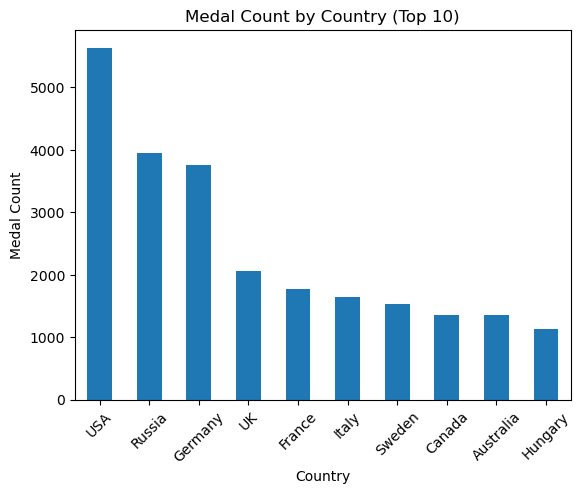

In [23]:
# Plot the chart
fig, ax = plt.subplots()
top_countries.plot(kind='bar', ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Medal Count')
ax.set_title('Medal Count by Country (Top 10)')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Group the data by country and medal type, and count the occurrences
country_medal_counts = medal_data.groupby(['region', 'Medal']).size().unstack(fill_value=0)


In [25]:
# Select the top 10 countries with the most medals
top_countries = country_medal_counts.sum(axis=1).sort_values(ascending=False).head(10)

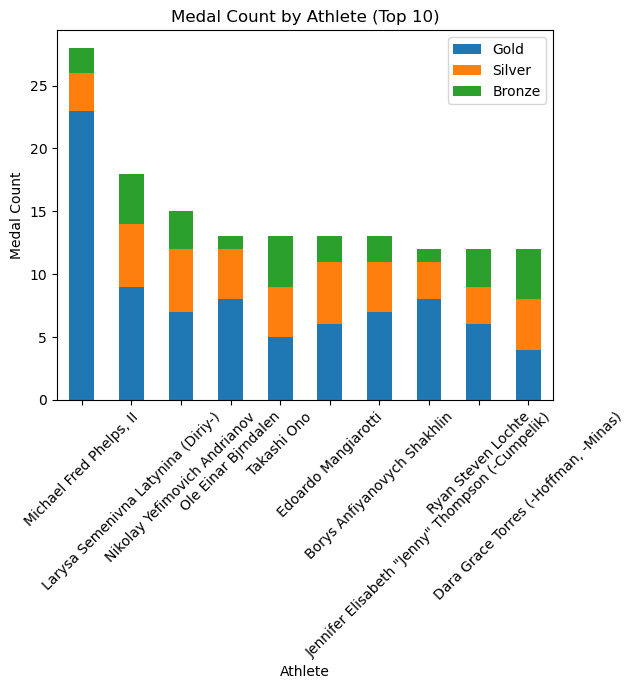

In [26]:
# Group the data by athlete and medal type, and count the occurrences
athlete_medal_counts = medal_data.groupby(['Name', 'Medal']).size().unstack(fill_value=0)

# Sort the athletes based on the total number of medals (gold, silver, and bronze)
athlete_medal_counts['Total Medals'] = athlete_medal_counts.sum(axis=1)
athlete_medal_counts = athlete_medal_counts.sort_values('Total Medals', ascending=False)

# Select the top 10 athletes with the most medals
top_athletes = athlete_medal_counts.head(10)

# Plot the chart
fig, ax = plt.subplots()
top_athletes[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Athlete')
ax.set_ylabel('Medal Count')
ax.set_title('Medal Count by Athlete (Top 10)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

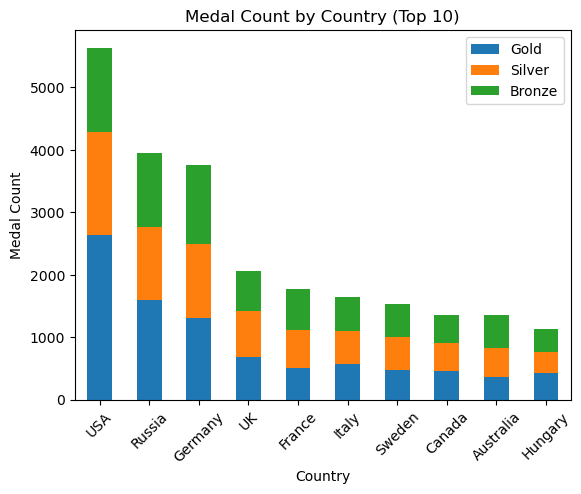

In [27]:
athlete_medal_counts = medal_data.groupby(['region', 'Medal']).size().unstack(fill_value=0)

# Sort the athletes based on the total number of medals (gold, silver, and bronze)
athlete_medal_counts['Total Medals'] = athlete_medal_counts.sum(axis=1)
athlete_medal_counts = athlete_medal_counts.sort_values('Total Medals', ascending=False)

# Select the top 10 athletes with the most medals
top_athletes = athlete_medal_counts.head(10)

# Plot the chart
fig, ax = plt.subplots()
top_athletes[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Medal Count')
ax.set_title('Medal Count by Country (Top 10)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

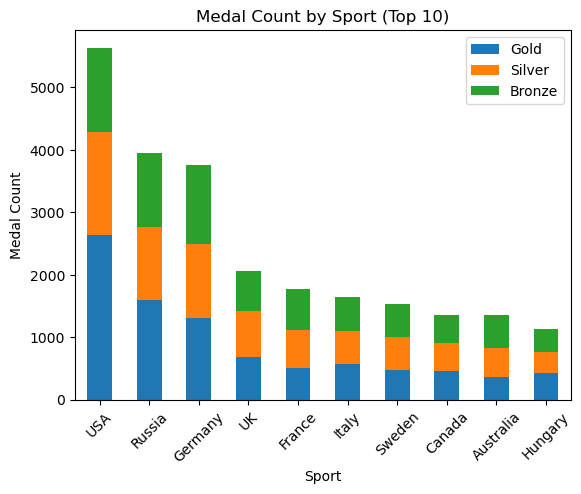

In [28]:
sport_medal_counts = medal_data.groupby(['Sport', 'Medal']).size().unstack(fill_value=0)

# Sort the athletes based on the total number of medals (gold, silver, and bronze)
sport_medal_counts['Total Medals'] = athlete_medal_counts.sum(axis=1)
sport_medal_counts = athlete_medal_counts.sort_values('Total Medals', ascending=False)

# Select the top 10 athletes with the most medals
top_athletes = athlete_medal_counts.head(10)

# Plot the chart
fig, ax = plt.subplots()
top_athletes[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Sport')
ax.set_ylabel('Medal Count')
ax.set_title('Medal Count by Sport (Top 10)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [29]:
#check percentage of GOld, Sliver and bronze by sports
# what country wins most gold sliver and bronze at what sports


# Group the data by country, sport, and medal type, and count the occurrences
country_sport_medal_counts = medal_data.groupby(['region', 'Sport', 'Medal']).size().unstack(fill_value=0)

# Find the sport with the most gold, silver, and bronze medals for each country
country_most_medals = country_sport_medal_counts.groupby('region').idxmax()

# Extract the country, sport, and medal type for each maximum count
country_most_gold = country_most_medals['Gold']
country_most_silver = country_most_medals['Silver']
country_most_bronze = country_most_medals['Bronze']

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Country': country_most_gold.index,
    'Gold Sport': country_most_gold.values,
    'Silver Sport': country_most_silver.values,
    'Bronze Sport': country_most_bronze.values
})

# Print the results
print(results)

                Country                     Gold Sport  \
0           Afghanistan       (Afghanistan, Taekwondo)   
1               Algeria           (Algeria, Athletics)   
2             Argentina          (Argentina, Football)   
3               Armenia           (Armenia, Wrestling)   
4             Australia          (Australia, Swimming)   
..                  ...                            ...   
131           Venezuela            (Venezuela, Boxing)   
132             Vietnam            (Vietnam, Shooting)   
133  Virgin Islands, US  (Virgin Islands, US, Sailing)   
134              Zambia            (Zambia, Athletics)   
135            Zimbabwe             (Zimbabwe, Hockey)   

                      Silver Sport                   Bronze Sport  
0         (Afghanistan, Taekwondo)       (Afghanistan, Taekwondo)  
1             (Algeria, Athletics)              (Algeria, Boxing)  
2            (Argentina, Football)            (Argentina, Hockey)  
3             (Armenia, Wrestli

In [30]:
results

,Country,Gold Sport,Silver Sport,Bronze Sport
0,Afghanistan,"(Afghanistan, Taekwondo)","(Afghanistan, Taekwondo)","(Afghanistan, Taekwondo)"
1,Algeria,"(Algeria, Athletics)","(Algeria, Athletics)","(Algeria, Boxing)"
2,Argentina,"(Argentina, Football)","(Argentina, Football)","(Argentina, Hockey)"
3,Armenia,"(Armenia, Wrestling)","(Armenia, Wrestling)","(Armenia, Weightlifting)"
4,Australia,"(Australia, Swimming)","(Australia, Swimming)","(Australia, Swimming)"
...,...,...,...,...
131,Venezuela,"(Venezuela, Boxing)","(Venezuela, Boxing)","(Venezuela, Boxing)"
132,Vietnam,"(Vietnam, Shooting)","(Vietnam, Shooting)","(Vietnam, Shooting)"
133,"Virgin Islands, US","(Virgin Islands, US, Sailing)","(Virgin Islands, US, Sailing)","(Virgin Islands, US, Sailing)"
134,Zambia,"(Zambia, Athletics)","(Zambia, Athletics)","(Zambia, Boxing)"


In [31]:
sport_df_copy = sport_df.copy()

In [32]:
# Defining BMI(Body Mass Index)


sport_df_copy['BMI'] = sport_df_copy['Weight']/sport_df_copy['Height']

In [33]:
# We need to encode our target

target_mapping = {'Gold': 1, 'Silver': 2, 'Bronze': 3, 'No Medal': 0}
sport_df_copy['Medal'] = sport_df_copy['Medal'].map(target_mapping)

In [34]:
sport_df_copy

,Name,Sex,Age,Height,Weight,Team,country_abbrv,Games,Year,Season,City,Sport,Event,Medal,region,BMI
0,A Dijiang,M,24,180.00,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,China,0.444444
1,A Lamusi,M,23,170.00,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,China,0.352941
2,Gunnar Nielsen Aaby,M,24,175.34,70.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,Denmark,0.403217
3,Edgar Lindenau Aabye,M,34,175.34,70.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1,Denmark,0.403217
4,Christine Jacoba Aaftink,F,21,185.00,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,Netherlands,0.443243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29,179.00,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0,Poland,0.497207
271112,Piotr ya,M,27,176.00,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0,Poland,0.335227
271113,Piotr ya,M,27,176.00,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0,Poland,0.335227
271114,Tomasz Ireneusz ya,M,30,185.00,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0,Poland,0.518919


In [35]:
sport_df_copy.isna().sum()

Name             0
Sex              0
Age              0
Height           0
Weight           0
Team             0
country_abbrv    0
Games            0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal            0
region           0
BMI              0
dtype: int64

In [36]:
# Select the features (X) and target (y)
features = ['Age', 'Weight', 'Height', 'BMI']
target = 'Medal'

In [37]:
X = sport_df_copy[features]
y = sport_df_copy[target]

In [38]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Random FOrest

model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
# Gradient Boost

model2 = GradientBoostingClassifier()
model2.fit(X_train, y_train)

GradientBoostingClassifier()

In [41]:
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
model4 = SVC()
model4.fit(X_train, y_train)

SVC()

In [43]:
model5 = KNeighborsClassifier()
model5.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
model6 = LogisticRegression()
model6.fit(X_train, y_train)

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

In [46]:
# Evaluate the model's performance

accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy of Random Forest: {accuracy1*100:.2f}%')
print(f'Accuracy of GraientBoost: {accuracy2*100:.2f}%')

Accuracy of Random Forest: 84.04%
Accuracy of GraientBoost: 85.38%


In [48]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred2)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred2)
# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred2)
print("Mean Squared Error:", mse)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.6806608884073673
Mean Absolute Error: 0.2920319117502216
R-squared: -0.14316433047413368


In [49]:
model3_pred = model3.predict(X_test)
model3_accuracy = accuracy_score(y_test, model3_pred)
model3_precision = precision_score(y_test, model3_pred, average='weighted')
model3_recall = recall_score(y_test, model3_pred, average='weighted')
model3_cm = confusion_matrix(y_test, model3_pred)

In [50]:
model2_pred = model2.predict(X_test)
model2_accuracy = accuracy_score(y_test, model2_pred)
model2_precision = precision_score(y_test, model2_pred, average='weighted')
model2_recall = recall_score(y_test, model2_pred, average='weighted')
model2_cm = confusion_matrix(y_test, model2_pred)

In [51]:
model4_pred = model4.predict(X_test)
model4_accuracy = accuracy_score(y_test, model4_pred)
model4_precision = precision_score(y_test, model4_pred, average='weighted')
model4_recall = recall_score(y_test, model4_pred, average='weighted')
model4_cm = confusion_matrix(y_test, model4_pred)

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
model5_pred = model5.predict(X_test)
model5_accuracy = accuracy_score(y_test, model5_pred)
model5_precision = precision_score(y_test, model5_pred, average='weighted')
model5_recall = recall_score(y_test, model5_pred, average='weighted')
model5_cm = confusion_matrix(y_test, model5_pred)


C:\Users\ancep\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [53]:
model6_pred = model6.predict(X_test)
model6_accuracy = accuracy_score(y_test, model6_pred)
model6_precision = precision_score(y_test, model6_pred, average='weighted')
model6_recall = recall_score(y_test, model6_pred, average='weighted')
model6_cm = confusion_matrix(y_test, model6_pred)

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# Print evaluation metrics and confusion matrix for each model
print("Decision Trees:")
print("Accuracy:", model3_accuracy)
print("Precision:", model3_precision)
print("Recall:", model3_recall)
print("Confusion Matrix:")
print(model3_cm)

print("Random Forests:")
print("Accuracy:", model2_accuracy)
print("Precision:", model3_precision)
print("Recall:", model3_recall)
print("Confusion Matrix:")
print(model3_cm)
# Similarly, you can print the evaluation metrics for SVM, KNN, and Logistic Regression models.

Decision Trees:
Accuracy: 0.8381020388062641
Precision: 0.744840945413784
Recall: 0.8381020388062641
Confusion Matrix:
[[67886   529   467   464]
 [ 3776    94    62    40]
 [ 3792    76    57    42]
 [ 3817    51    34    37]]
Random Forests:
Accuracy: 0.8537870580124102
Precision: 0.744840945413784
Recall: 0.8381020388062641
Confusion Matrix:
[[67886   529   467   464]
 [ 3776    94    62    40]
 [ 3792    76    57    42]
 [ 3817    51    34    37]]
